In [1]:
# Let's load the required libs.
# We'll be using the Tensorflow backend (default).
from keras.models import Sequential
from keras.layers.recurrent import LSTM
from keras.layers.core import Dense, Activation, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle

Using TensorFlow backend.


In [2]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("sms-call-internet-mi-2013-11-01.txt",sep="\t",nrows=100,header=None)

In [4]:
df.columns = ['a', 'b','c','d','e','f','g','h']
df = df.fillna(df.mean())

In [5]:
X = df

In [6]:
X = X.drop(['a'],axis=1)

In [7]:
X = X[(X['c']!=0)]
X

,b,c,d,e,f,g,h
1,1383260400000,39,0.141864,0.156787,0.160938,0.052275,11.028366
3,1383261000000,33,0.141134,0.117629,0.101363,0.091478,0.026137
4,1383261000000,39,0.278452,0.119926,0.188777,0.133637,11.100963
6,1383261600000,39,0.330641,0.170952,0.134176,0.054601,10.892771
8,1383262200000,39,0.681434,0.220815,0.027300,0.053438,8.622425
10,1383262800000,39,0.243378,0.192891,0.053438,0.080738,8.009927
12,1383263400000,39,0.056388,0.243378,0.027300,0.027300,8.118420
14,1383264000000,39,0.135339,0.084937,0.053438,0.001787,8.026270
16,1383264600000,39,0.188777,0.026137,0.001787,0.054601,8.514179
17,1383265200000,39,0.242215,0.160314,0.108039,0.026137,6.833425


In [8]:
X['i'] = df['d']+df['e']+df['f']+df['g']+df['h']

In [15]:
X = X.sort_values('b')

In [18]:
X['i'].min()

0.4777409383222535

In [27]:
# Bin the data frame by "a" with 10 bins...
bins = np.linspace(X.i.min(), X.i.max(), 10)
groups = X.groupby(np.digitize(X, bins))

# Get the mean of each bin:
#print(groups.mean()) # Also could do "groups.aggregate(np.mean)"
# Similarly, the median:
#print(groups.median())

TypeError: 'DataFrameGroupBy' object is not callable

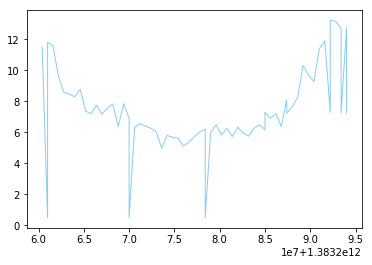

In [10]:
plt.plot( X['b'],X['i'] , color='skyblue', linewidth=1)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

NameError: name 'y' is not defined

In [ ]:
# #def fit_model(train_X, train_Y, window_size = 1):
# def model():
#     model = Sequential()
    
#     model.add(LSTM(4, 
#                    input_shape = (50, 1)))
#     #model.add(Dropout(0.5))
#     #model.add(LSTM(256))
#     model.add(Dropout(0.5))
#     model.add(Dense(1))
#     model.add(Activation("linear"))
#     #model.compile(loss = "mean_squared_error",optimizer = "adam")
#     #model.fit(train_X,train_Y,epochs = 100,batch_size = 1,verbose = 2)
    
#     return(model)

# # Fit the first model.
# #model1 = fit_model(train_X, train_Y, window_size)
# model().summary()

In [ ]:
def to_supervised(train, n_input, n_out=7):
    # flatten data
    data = train.reshape((train.shape[0]*train.shape[1], train.shape[2]))
    X, y = list(), list()
    in_start = 0
    # step over the entire history one time step at a time
    for _ in range(len(data)):
        # define the end of the input sequence
        in_end = in_start + n_input
        out_end = in_end + n_out
        # ensure we have enough data for this instance
        if out_end < len(data):
            x_input = data[in_start:in_end, 0]
            x_input = x_input.reshape((len(x_input), 1))
            X.append(x_input)
            y.append(data[in_end:out_end, 0])
        # move along one time step
        in_start += 1
    return array(X), array(y)

In [ ]:
# # train the model
# def build_model(train, n_input):
#     # prepare data
#     #train_x, train_y = to_supervised(train, n_input)
#     train_x,train_y = train,n_input
#     # define parameters
#     verbose, epochs, batch_size = 0, 70, 16
#     n_timesteps, n_features, n_outputs = train_x.shape[1], train_x.shape[2], train_y.shape[1]
#     # define model
#     model = Sequential()
#     model.add(LSTM(200, activation='relu', input_shape=(n_timesteps, n_features)))
#     model.add(Dense(100, activation='relu'))
#     model.add(Dense(n_outputs))
#     model.compile(loss='mse', optimizer='adam')
#     # fit network
#     model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, verbose=verbose)
#     return mode

In [ ]:
# build_model(X,y)